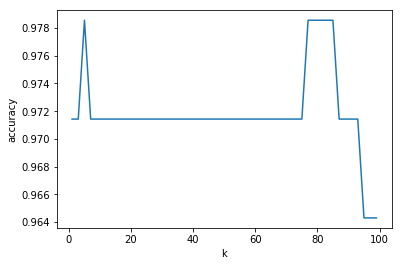

k for max accuracy is 5


In [20]:
import numpy as np
import matplotlib.pyplot as pt
from collections import Counter
import pandas as pd
def knn(val_data,train,k=3):#val_data is a dictionary with 2 groups eaach containing several lists of x1,x2,etc
    distances=[]
    for group in val_data:
        for features in val_data[group]:
            distance=np.linalg.norm(np.array(features)-np.array(train))
            distances.append([distance,group])
    votes=[i[1] for i in sorted(distances)[:k]]
    return Counter(votes).most_common(1)[0][0]
df=pd.read_csv('Breast-Cancer.csv')
df.replace('?',-9999,inplace=True)
df.drop(['id'],axis=1,inplace=True)
dataset=df.astype(float).values.tolist()
dataset
import random
random.shuffle(dataset)
train_size=0.8
train_data=dataset[:(int)(train_size*len(dataset))]
test_data=dataset[(int)(train_size*len(dataset)):]
train_set={2:[],4:[]}
test_set={2:[],4:[]}
for lis in train_data:
    train_set[lis[-1]].append(lis[:-1])
for lis in test_data:
    test_set[lis[-1]].append(lis[:-1])
z=[i for i in range(1,100,2)]
accuracy=[]
total=len(test_data)
for k in range(1,100,2):
    count=0
    for group in test_set:
        for test in test_set[group]:
            vote=knn(train_set,test,k)
            if vote==group:
                count+=1
    accuracy.append(count/total)
pt.xlabel('k')
pt.ylabel('accuracy')
pt.plot(z,accuracy)
pt.show()
print("k for max accuracy is %d"%(z[accuracy.index(max(accuracy))]))